<a href="https://colab.research.google.com/github/leshaz44/Aliaksei/blob/main/Task_3/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Файл CSV успешно загружен.
(90000.0, 32)
(150000.0, 45)
(60000.0, 36)
(200000.0, 52)
(120000.0, 42)
(80000.0, 31)
(110000.0, 38)
(140000.0, 48)
(65000.0, 35)
(130000.0, 40)
(125000.0, 44)
(90000.0, 33)
(115000.0, 39)
(180000.0, 51)
(80000.0, 34)
(190000.0, 47)
(60000.0, 36)
(140000.0, 41)
(110000.0, 37)
(140000.0, 43)


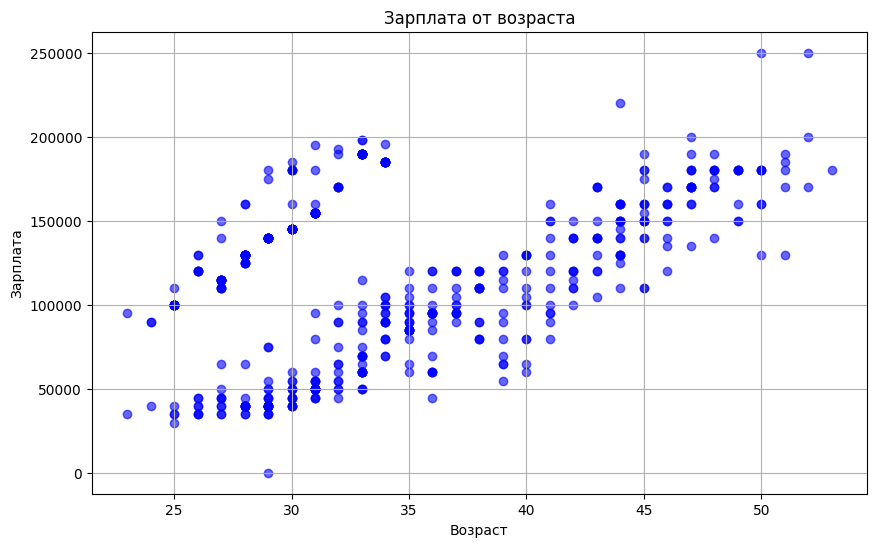

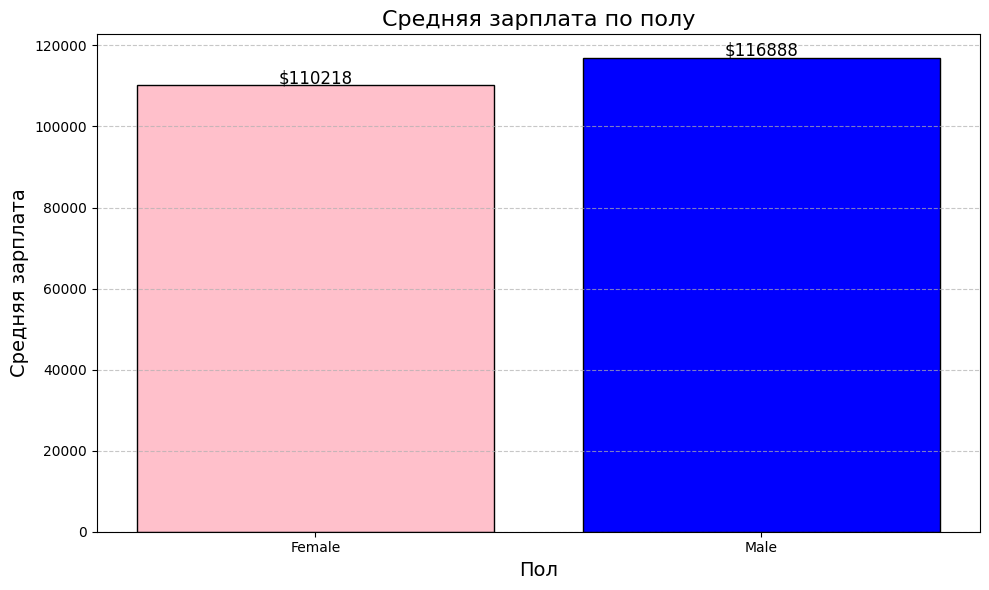

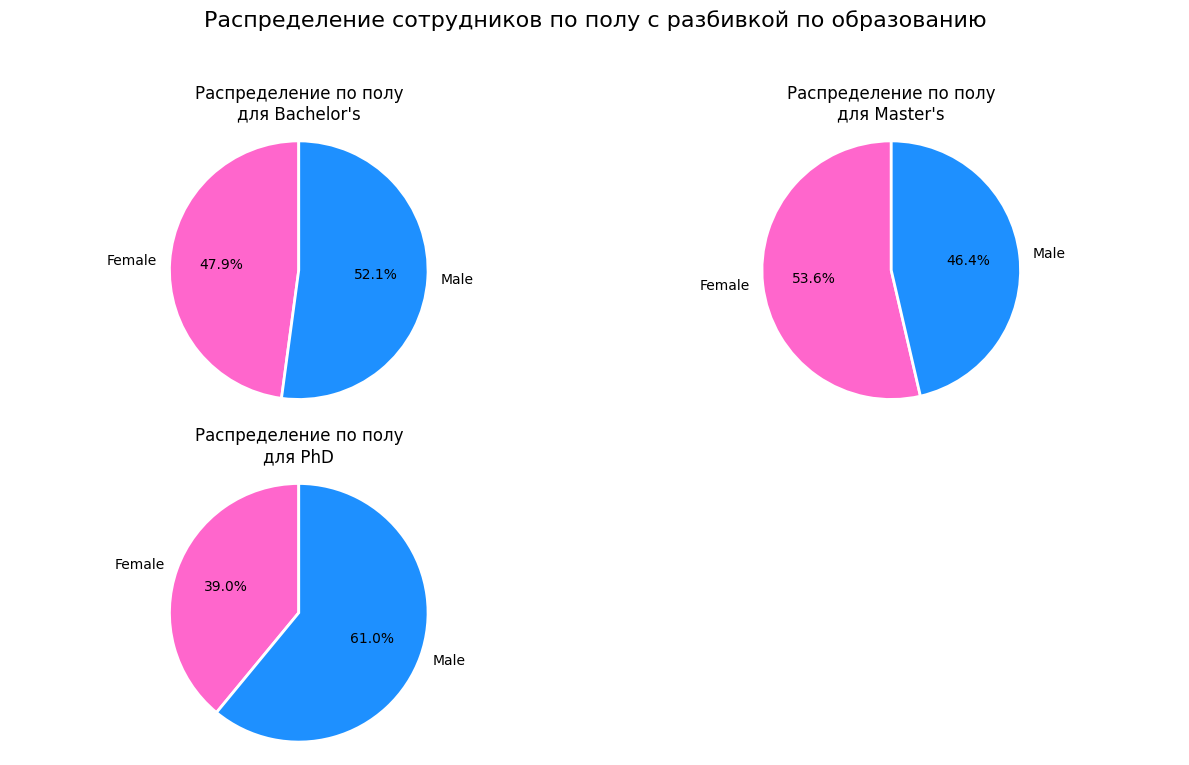

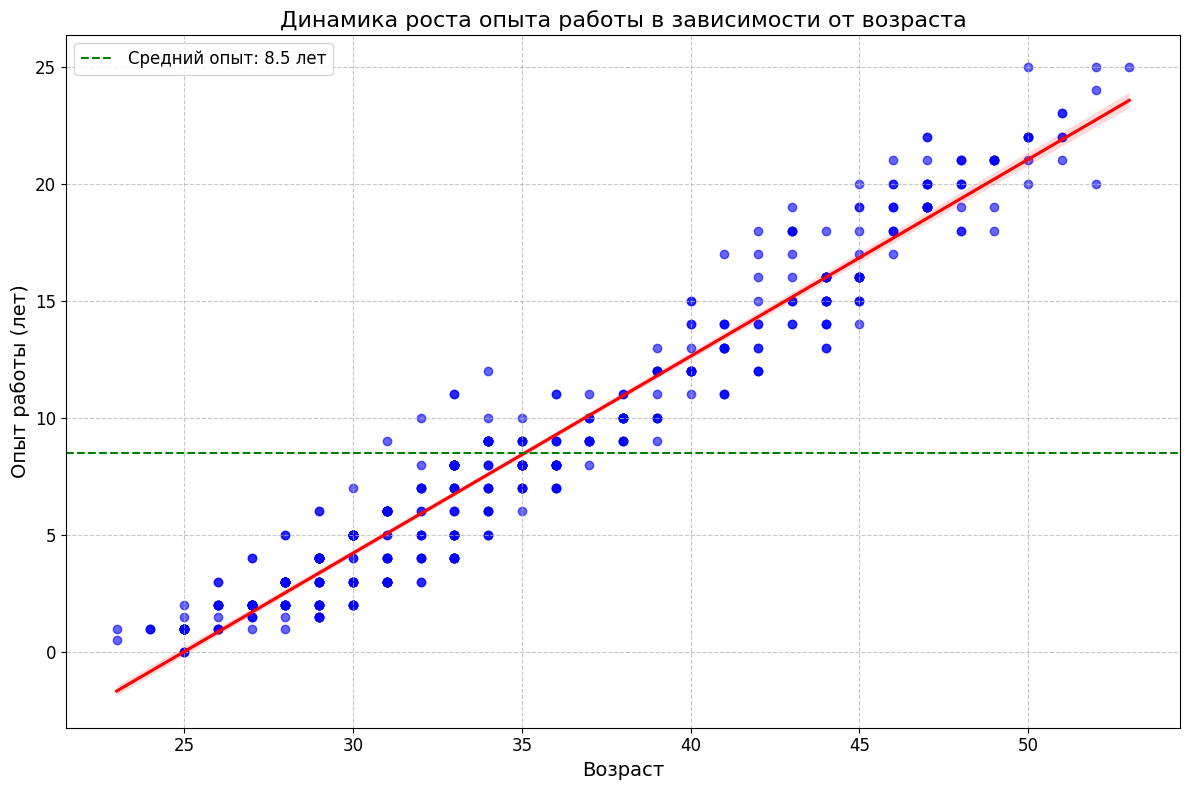

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns  # Добавляем импорт seaborn

# Загрузка файла CSV
df = pd.read_csv('data_Salary2.csv')
# Проверка загрузки
try:
    df = pd.read_csv('data_Salary2.csv')  # Читаем CSV-файл

    if len(df) > 0:               # Проверяем наличие записей в таблице
        print("Файл CSV успешно загружен.")
    else:
        print("Файл пустой!")
except FileNotFoundError:
    print("Ошибка: Файл data_Salary2.csv не найден.")
except Exception as e:
    print(f"Произошла ошибка при чтении файла: {e}")


# Подключение к базе данных SQLite
conn = sqlite3.connect('example.db')
cursor = conn.cursor()

# Создание таблицы
cursor.execute('''CREATE TABLE IF NOT EXISTS table_name (
  id INTEGER PRIMARY KEY,
  Age INTEGER TEXT,
  Gender TEXT,
  Education TEXT,
  Job TEXT,
  Experience FLOAT,
  Salary FLOAT)''')

# Импортируем данные из DataFrame в созданную таблицу
df.to_sql('table_name', con=conn, index=False, if_exists='append')

# Выбор определенных столбцов и фильтрация результатов
cursor.execute("SELECT Salary, Age FROM table_name WHERE age > 30 LIMIT 20")
result = cursor.fetchall()
for row in result:
    print(row)

# Построим график зависимости оплаты труда от возраста
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], color='blue', alpha=0.6)
plt.title('Зарплата от возраста')
plt.xlabel('Возраст')
plt.ylabel('Зарплата')
plt.grid(True)
# Показываем график
plt.show()

# Построим cтолбчатую диаграмму соотношения мужчин и женщин в зависимости от зарплаты
# Группируем данные по полу и вычисляем среднюю зарплату
salary_stats = df.groupby('Gender')['Salary'].mean().reset_index()

# Создаем столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(
    salary_stats['Gender'],        # Категории (пол)
    salary_stats['Salary'],        # Значения зарплат
    color=['pink', 'blue'],        # Цвета для мужчин и женщин
    edgecolor='black'             # Цвет границ столбцов
)
# Добавляем подписи
plt.title('Средняя зарплата по полу', fontsize=16)
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Средняя зарплата', fontsize=14)
plt.ylim(bottom=0)  # Начинаем ось Y с нуля
# Добавляем значения над столбцами
for i, value in enumerate(salary_stats['Salary']):
    plt.text(
        i,
        value + 500,  # Смещение текста вверх
        f'${value:.0f}',  # Форматируем значение
        ha='center',
        fontsize=12
    )
# Оформляем сетку
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Показываем график
plt.tight_layout()
plt.show()

# Построим столбчатую диаграмму соотношения мужчин и женщин в разных профессиях
# Группируем данные по образованию и полу
education_gender_stats = df.groupby(['Education', 'Gender']).size().reset_index(name='count')

# Создаем круговую диаграмму
plt.figure(figsize=(12, 8))

# Создаем подграфики для каждого уровня образования
education_levels = df['Education'].unique()

# Определяем цвета для полов
colors = {'Male': '#1E90FF', 'Female': '#FF66CC'}

for i, level in enumerate(education_levels):
    plt.subplot(2, 2, i+1)  # Размещаем 4 подграфика

    # Фильтруем данные по уровню образования
    data = education_gender_stats[education_gender_stats['Education'] == level]

    # Строим круговую диаграмму
    plt.pie(
        data['count'],
        labels=data['Gender'],
        autopct='%1.1f%%',
        startangle=90,
        colors=[colors[g] for g in data['Gender']],
        wedgeprops={'edgecolor': 'w', 'linewidth': 2}
    )

    plt.title(f'Распределение по полу\nдля {level}', fontsize=12)
    plt.axis('equal')  # Делаем диаграмму круглой

# Настройка общего вида
plt.suptitle('Распределение сотрудников по полу с разбивкой по образованию', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Проверяем наличие необходимых столбцов
required_columns = ['Age', 'Experience']
if all(column in df.columns for column in required_columns):

    # Создаем график
    plt.figure(figsize=(12, 8))

    # Строим scatter plot с линией тренда
    sns.regplot(
        x='Age',
        y='Experience',
        data=df,
        scatter_kws={'alpha':0.6, 'color':'blue'},
        line_kws={'color':'red'}
    )

    # Добавляем дополнительные элементы
    plt.title('Динамика роста опыта работы в зависимости от возраста', fontsize=16)
    plt.xlabel('Возраст', fontsize=14)
    plt.ylabel('Опыт работы (лет)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Добавляем среднюю линию
    plt.axhline(y=df['Experience'].mean(), color='green', linestyle='--', label=f'Средний опыт: {df["Experience"].mean():.1f} лет')

    # Добавляем легенду
    plt.legend(fontsize=12)

    # Улучшаем читаемость
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    plt.show()
else:
    print("В данных отсутствуют необходимые столбцы!")
# Закрытие соединения
conn.commit()
conn.close()